# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import datetime
import openweathermapy as owm
from config import api_key
from citipy import citipy
import csv
import random
import requests
 
import seaborn as sns
# Output File (CSV)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
from citipy import citipy 
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#make API calls and collect data



In [4]:
from config import api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [5]:


count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, ** settings)
        
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')


Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?q=kulhudhuffushi&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Processing Record 2 of Set 0 | te anau
http://api.openweathermap.org/data/2.5/weather?q=te%20anau&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 3 of Set 0 | cherskiy
http://api.openweathermap.org/data/2.5/weather?q=cherskiy&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 4 of Set 0 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?q=pontes%20e%20lacerda&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 5 of Set 0 | eureka
http://api.openweathermap.org/data/2.5/weather?q=eureka&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 6 of Set 0 | quelimane
http://api.openweathermap.org/data/2.5/weather?q=quelimane&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 7 of Set 0 | lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 8 of Set 0 | rikitea
http://api.openweathermap.org/data/2.5/

Processing Record 5 of Set 1 | stornoway
http://api.openweathermap.org/data/2.5/weather?q=stornoway&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 6 of Set 1 | ambunti
http://api.openweathermap.org/data/2.5/weather?q=ambunti&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 7 of Set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?q=saleaula&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 8 of Set 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 9 of Set 1 | tlanepantla
http://api.openweathermap.org/data/2.5/weather?q=tlanepantla&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 10 of Set 1 | troitsko-pechorsk
http://api.openweathermap.org/data/2.5/weather?q=troitsko-pechorsk&units=imperial&APPID=25bc90a1196e6f15

Processing Record 8 of Set 2 | seoul
http://api.openweathermap.org/data/2.5/weather?q=seoul&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 9 of Set 2 | svetlyy
http://api.openweathermap.org/data/2.5/weather?q=svetlyy&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 10 of Set 2 | isangel
http://api.openweathermap.org/data/2.5/weather?q=isangel&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 11 of Set 2 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?q=tuy%20hoa&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 12 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 13 of Set 2 | vaini
http://api.openweathermap.org/data/2.5/weather?q=vaini&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 14 of Set 2 | attawapiskat
http://api.openweatherm

HTTP Error 404: Not Found
Processing Record 10 of Set 3 | damphu
http://api.openweathermap.org/data/2.5/weather?q=damphu&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 11 of Set 3 | wanning
http://api.openweathermap.org/data/2.5/weather?q=wanning&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 12 of Set 3 | tahta
http://api.openweathermap.org/data/2.5/weather?q=tahta&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 13 of Set 3 | barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 14 of Set 3 | kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 15 of Set 3 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 16 of Set 3 | pokhara
http:/

Processing Record 13 of Set 4 | clyde river
http://api.openweathermap.org/data/2.5/weather?q=clyde%20river&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 14 of Set 4 | loukhi
http://api.openweathermap.org/data/2.5/weather?q=loukhi&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 15 of Set 4 | paraiso
http://api.openweathermap.org/data/2.5/weather?q=paraiso&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 16 of Set 4 | yining
http://api.openweathermap.org/data/2.5/weather?q=yining&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 17 of Set 4 | sakakah
http://api.openweathermap.org/data/2.5/weather?q=sakakah&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 18 of Set 4 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 19 of Set 4 | erenhot
http://a

Processing Record 16 of Set 5 | balsas
http://api.openweathermap.org/data/2.5/weather?q=balsas&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 17 of Set 5 | faya
http://api.openweathermap.org/data/2.5/weather?q=faya&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 18 of Set 5 | bardiyah
http://api.openweathermap.org/data/2.5/weather?q=bardiyah&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 19 of Set 5 | valleyview
http://api.openweathermap.org/data/2.5/weather?q=valleyview&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 20 of Set 5 | namibe
http://api.openweathermap.org/data/2.5/weather?q=namibe&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 21 of Set 5 | kangalassy
http://api.openweathermap.org/data/2.5/weather?q=kangalassy&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 22 of Set 5 | luena
http://api.openweathermap.

Processing Record 19 of Set 6 | tadine
http://api.openweathermap.org/data/2.5/weather?q=tadine&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 20 of Set 6 | tasbuget
http://api.openweathermap.org/data/2.5/weather?q=tasbuget&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 21 of Set 6 | ixtapa
http://api.openweathermap.org/data/2.5/weather?q=ixtapa&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 22 of Set 6 | snezhnogorsk
http://api.openweathermap.org/data/2.5/weather?q=snezhnogorsk&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 23 of Set 6 | zaranj
http://api.openweathermap.org/data/2.5/weather?q=zaranj&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 24 of Set 6 | dongsheng
http://api.openweathermap.org/data/2.5/weather?q=dongsheng&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 25 of Set 6 | mecca
http://api.openweath

Processing Record 22 of Set 7 | flers
http://api.openweathermap.org/data/2.5/weather?q=flers&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 23 of Set 7 | hobyo
http://api.openweathermap.org/data/2.5/weather?q=hobyo&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 24 of Set 7 | klaksvik
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 25 of Set 7 | pousat
http://api.openweathermap.org/data/2.5/weather?q=pousat&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 26 of Set 7 | mwinilunga
http://api.openweathermap.org/data/2.5/weather?q=mwinilunga&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 27 of Set 7 | sol-iletsk
http://api.openweathermap.org/data/2.5/weather?q=sol-iletsk&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 28 of Set 7 | prince rupert
http://api.openwea

Processing Record 25 of Set 8 | radzionkow
http://api.openweathermap.org/data/2.5/weather?q=radzionkow&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 26 of Set 8 | teahupoo
http://api.openweathermap.org/data/2.5/weather?q=teahupoo&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 27 of Set 8 | sanming
http://api.openweathermap.org/data/2.5/weather?q=sanming&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 28 of Set 8 | esmeraldas
http://api.openweathermap.org/data/2.5/weather?q=esmeraldas&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 29 of Set 8 | ekhabi
http://api.openweathermap.org/data/2.5/weather?q=ekhabi&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 30 of Set 8 | carutapera
http://api.openweathermap.org/data/2.5/weather?q=carutapera&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 31 of Set 8 | vao
http://api.openweathermap.org/data/2.5/w

Processing Record 28 of Set 9 | floro
http://api.openweathermap.org/data/2.5/weather?q=floro&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 29 of Set 9 | hibbing
http://api.openweathermap.org/data/2.5/weather?q=hibbing&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 30 of Set 9 | bonavista
http://api.openweathermap.org/data/2.5/weather?q=bonavista&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 31 of Set 9 | manono
http://api.openweathermap.org/data/2.5/weather?q=manono&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 32 of Set 9 | huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 33 of Set 9 | norman wells
http://api.openweathermap.org/data/2.5/weather?q=norman%20wells&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 34 of Set 9 | daru
http://api.openweathermap.org/data/2.5/weather?

Processing Record 31 of Set 10 | mutsamudu
http://api.openweathermap.org/data/2.5/weather?q=mutsamudu&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
HTTP Error 404: Not Found
Processing Record 32 of Set 10 | gornyy
http://api.openweathermap.org/data/2.5/weather?q=gornyy&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 33 of Set 10 | zvishavane
http://api.openweathermap.org/data/2.5/weather?q=zvishavane&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 34 of Set 10 | belle fourche
http://api.openweathermap.org/data/2.5/weather?q=belle%20fourche&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 35 of Set 10 | tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 36 of Set 10 | nara
http://api.openweathermap.org/data/2.5/weather?q=nara&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 37 of Set 10 | dalbandin
htt

Processing Record 34 of Set 11 | ruwi
http://api.openweathermap.org/data/2.5/weather?q=ruwi&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 35 of Set 11 | fatehpur
http://api.openweathermap.org/data/2.5/weather?q=fatehpur&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 36 of Set 11 | ancud
http://api.openweathermap.org/data/2.5/weather?q=ancud&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 37 of Set 11 | pesaro
http://api.openweathermap.org/data/2.5/weather?q=pesaro&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 38 of Set 11 | port lavaca
http://api.openweathermap.org/data/2.5/weather?q=port%20lavaca&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 39 of Set 11 | mayo
http://api.openweathermap.org/data/2.5/weather?q=mayo&units=imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing Record 40 of Set 11 | gobabis
http://api.openweathermap.org/data/2.5/weather?q=goba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Kulhudhuffushi,36,MV,1541286381,83.31,4.21,6.62,73.07,100
1,Te Anau,92,NZ,1541286177,43.53,12.88,-45.41,167.72,89
2,Cherskiy,24,RU,1541286382,-7.73,2.86,68.75,161.3,78
3,Pontes e Lacerda,0,BR,1541286382,78.9,4.21,-15.23,-59.33,81
4,Eureka,1,US,1541284800,59,13.87,40.8,-124.16,77
5,Quelimane,88,MZ,1541286383,74.4,10.36,-17.88,36.89,75
6,Lebu,0,ET,1541286383,41.91,2.26,8.96,38.73,81
7,Rikitea,44,PF,1541286383,75.26,21.43,-23.12,-134.97,95
8,Provideniya,44,RU,1541286230,35.39,5.73,64.42,-173.23,100
9,Airai,0,TL,1541285804,79.58,2.26,-8.93,125.41,66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

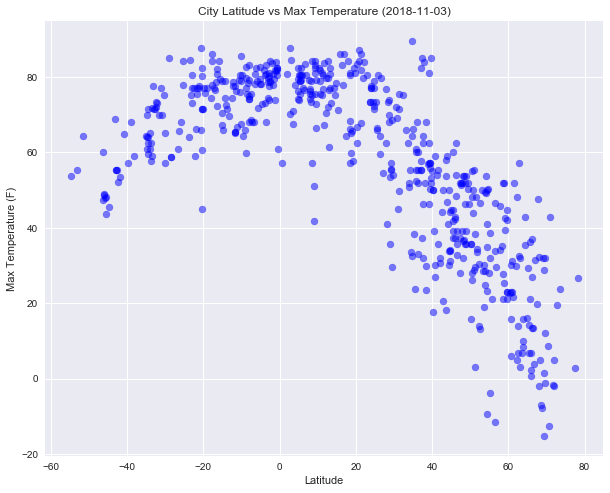

In [7]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='blue', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

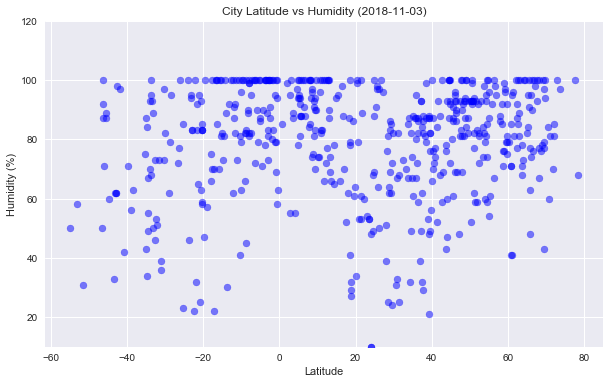

In [8]:
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

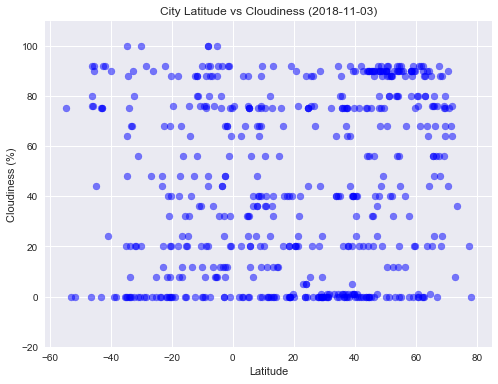

In [9]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='blue', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

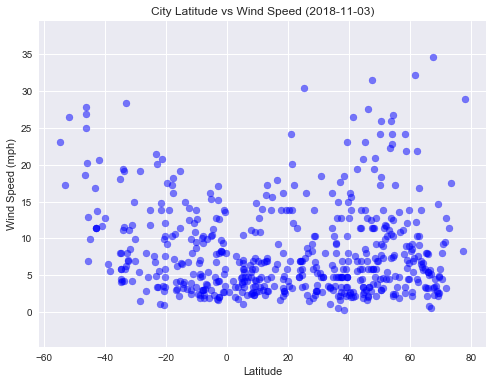

In [10]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='blue', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()